```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```

## 导入依赖

In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import open3d as o3d

# 阿凯机器人工具箱
from kyle_robot_toolbox.camera import Gemini335
from kyle_robot_toolbox.open3d import draw_geometry

pybullet build time: Jun  3 2022 02:05:55


In [2]:
%matplotlib inline

## 创建相机对象

In [3]:
# 创建相机对象
camera = Gemini335()

## 读入彩图与深度图

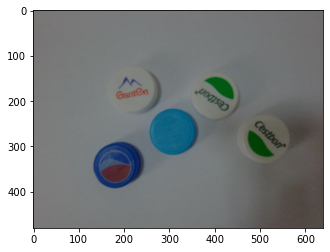

In [4]:
# 拍摄彩图跟深度图
color_image, depth_image = camera.read()

# # 从文件中载入彩图
# img_name = "demo" # 图像ID
# color_image = cv2.imread(f"./data/example/camera_io/{img_name}.png")
# # 从文件中载入深度图(二进制格式)
# depth_image = np.load(f"./data/example/camera_io/{img_name}.npy")

# 获取图像维度
img_height, img_width, img_channel = color_image.shape

plt.imshow(color_image[:, :, ::-1])


In [5]:
color_image.shape

(480, 640, 3)

In [6]:
depth_image.shape

(480, 640)

## 保存深度图与彩图

In [7]:
# 保存PCD点云 二进制格式
image_name = "demo"
folder_path = os.path.join("data", "example", "camera_io")
cv2.imwrite(os.path.join(folder_path, f"{image_name}.png"), color_image)
np.save(os.path.join(folder_path, f"{image_name}.npy"), depth_image)

## 创建二值化罩层(Mask)

随便定义一个二值化罩层，定义一个矩形区域
* 图像X轴范围: [200, 100]
* 图像Y轴范围: [500, 300]

则$ROI[x_1, y_1, x_2, y_2] = [200, 100, 500, 300]$， 只获取ROI区域内的点云数据。 
在画布上标识这块区域

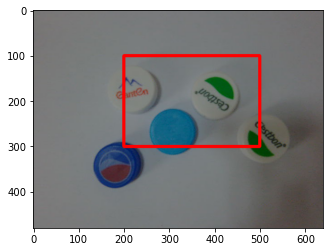

In [8]:
# 定义ROI区域
rect_roi = [200, 100, 500, 300]
x1, y1, x2, y2 = rect_roi


# 绘制彩图中的ROI区域
canvas = np.copy(color_image)
canvas = cv2.rectangle(canvas, (x1, y1), (x2, y2), [0, 0, 255], 5)
plt.imshow(canvas[:, :, ::-1])

In [9]:
cv2.imwrite(f"./data/example/camera_io/demo_roi.png", canvas)

True

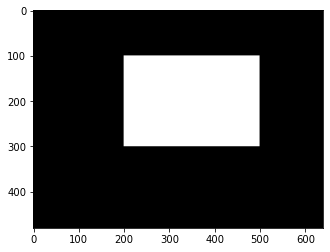

In [10]:
# 创建空的罩层
mask = np.zeros((img_height, img_width), dtype=np.uint8)
# 赋值罩层

mask[y1:y2, x1:x2] = 255
# 可视化罩层
plt.imshow(mask, cmap="gray")

In [11]:
cv2.imwrite(f"./data/example/camera_io/mask.png", mask)

True

## 使用二值化罩层筛选点云

In [12]:
# 根据罩层获取点云
pcd_rect_roi = camera.get_pcd(color_image, depth_image,\
                          mask=mask, camera="rgb_camera")

# 点云可视化
draw_geometry([pcd_rect_roi], window_name="点云ROI区域")

In [13]:
# 保存PCD点云 二进制格式
pcd_rect_roi_name = "pcd_rect_roi"
o3d.io.write_point_cloud(f"./data/example/camera_io/{pcd_rect_roi_name}.pcd", pcd_rect_roi)

True